In [48]:
import pandas as pd
import ultraplot as pplt
import numpy as np

df = pd.read_csv('../data/validation_dataset_testtrain_split.csv')
df_imstats = pd.read_csv('../data/validation_dataset_image_statistics.csv')
df_imstats.rename({'region': 'case_name'}, axis=1, inplace=True)

In [49]:
df.columns

Index(['Unnamed: 0', 'case_number', 'region', 'start_date', 'center_lon',
       'center_lat', 'center_x', 'center_y', 'month', 'sea_ice_fraction',
       'mean_sea_ice_concentration', 'init_case_number', 'satellite',
       'visible_sea_ice', 'visible_landfast_ice', 'visible_floes',
       'visible_water', 'cloud_fraction_manual', 'cloud_category_manual',
       'artifacts', 'qa_analyst', 'qa_reviewer', 'fl_analyst', 'fl_reviewer',
       'psd_file', 'floe_obscuration', 'landfast_obscuration',
       'modis_cloud_error', 'notes', 'training'],
      dtype='object')

In [50]:
df_merged = df.merge(df_imstats.loc[df_imstats.tile == 0], left_on=["satellite", "case_number"], right_on = ["satellite", "case_number"])

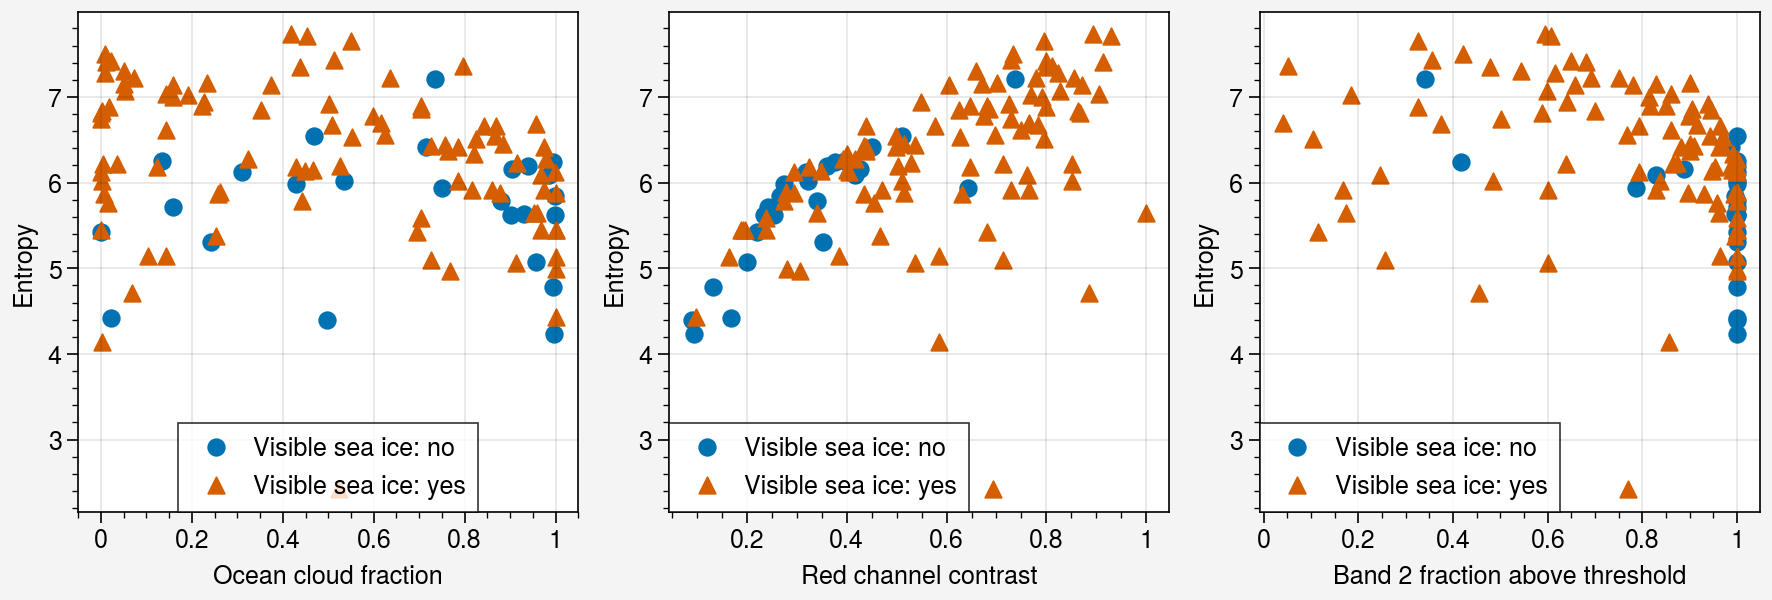

In [29]:
train_idx = df_merged.training

fig, axs = pplt.subplots(ncols=3, share=False)
marker = "o" 
ax = axs[0]
for name, group in df_merged.loc[train_idx, :].groupby("visible_sea_ice"):
    ax.scatter(group["ocean_cloud_fraction"], group["entropy"], label="Visible sea ice: " + name, marker=marker)
    marker = "^"
ax.legend(ncols=1)
ax.format(ylabel="Entropy", xlabel="Ocean cloud fraction")

ax = axs[1]
marker = "o"
for name, group in df_merged.loc[train_idx, :].groupby("visible_sea_ice"):
    ax.scatter(group["contrast_red"], group["entropy"], label="Visible sea ice: " + name, marker=marker)
    marker = "^"
ax.legend(ncols=1)
ax.format(ylabel="Entropy", xlabel="Red channel contrast")

ax = axs[2]
marker = "o"
for name, group in df_merged.loc[train_idx, :].groupby("visible_sea_ice"):
    ax.scatter(group["possible_clear_sky_ice"], group["entropy"], label="Visible sea ice: " + name, marker=marker)
    marker = "^"
ax.legend(ncols=1)
ax.format(ylabel="Entropy", xlabel="Band 2 fraction above threshold")

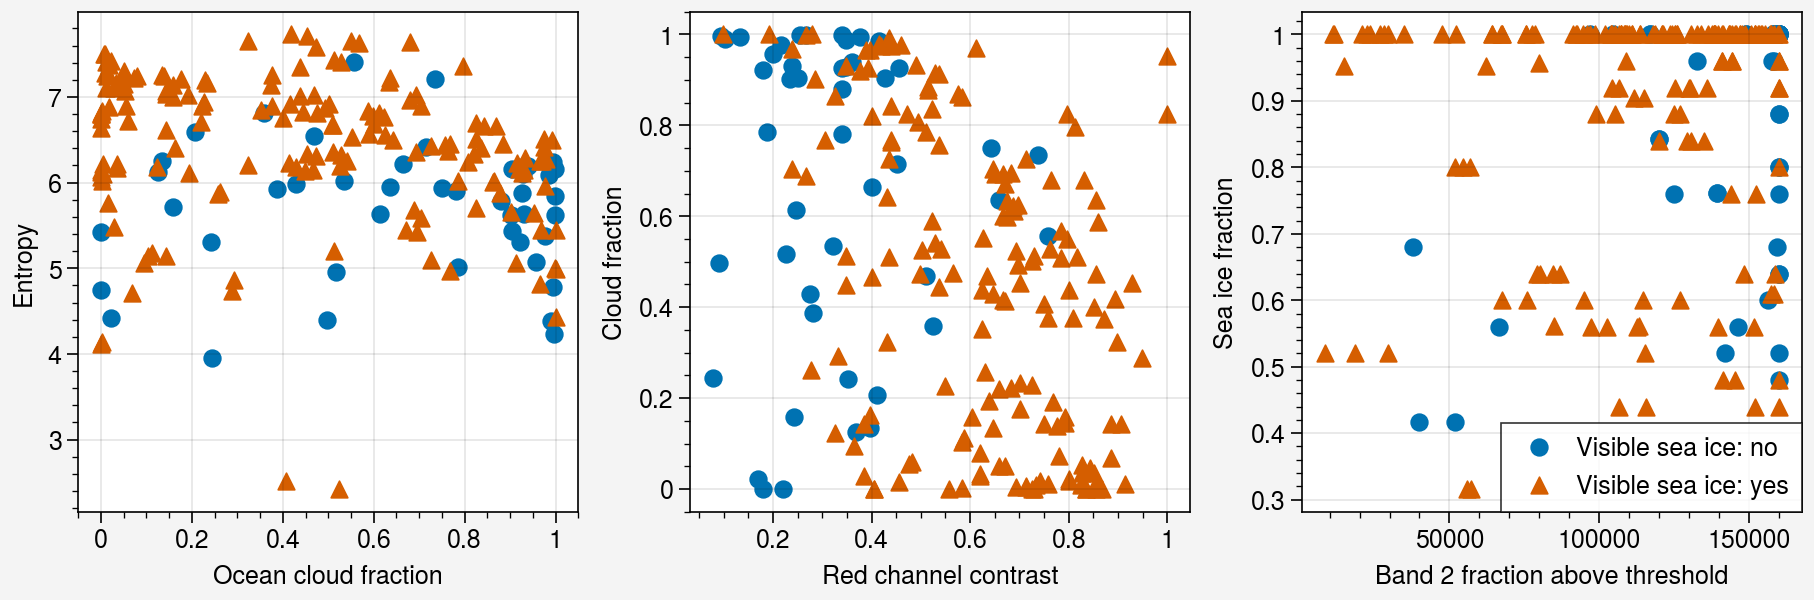

In [59]:
train_idx = df_merged.training & (df_merged.floe_obscuration != "heavy")

fig, axs = pplt.subplots(ncols=3, share=False)
marker = "o" 
ax = axs[0]
for name, group in df_merged.loc[train_idx, :].groupby("visible_sea_ice"):
    ax.scatter(group["ocean_cloud_fraction"], group["entropy"], label="Visible sea ice: " + name, marker=marker)
    marker = "^"
ax.format(ylabel="Entropy", xlabel="Ocean cloud fraction")

ax = axs[1]
marker = "o"
for name, group in df_merged.loc[train_idx, :].groupby("visible_sea_ice"):
    ax.scatter(group["contrast_red"], group["ocean_cloud_fraction"], label="Visible sea ice: " + name, marker=marker)
    marker = "^"
ax.format(ylabel="Cloud fraction", xlabel="Red channel contrast")

ax = axs[2]
marker = "o"
for name, group in df_merged.loc[train_idx, :].groupby("visible_sea_ice"):
    ax.scatter(group["possible_clear_sky_ice"] * 400**2 * (1 - group['land_fraction']), group["sea_ice_fraction"], label="Visible sea ice: " + name, marker=marker)
    marker = "^"
ax.legend(ncols=1)
ax.format(ylabel="Sea ice fraction", xlabel="Band 2 fraction above threshold")

In [47]:
df_merged.loc[train_idx & (df_merged.visible_sea_ice == "no") & (df_merged.contrast_red < 0.25)]

,Unnamed: 0,case_number,region,start_date,center_lon,center_lat,center_x,center_y,month,sea_ice_fraction,...,floe_obscuration,landfast_obscuration,modis_cloud_error,notes,training,case_name,entropy,contrast_red,ocean_cloud_fraction,possible_clear_sky_ice
36,038_aqua,38,barents_kara_seas,2014-08-02,88.339718,78.769967,887500,837500,8,1.000,...,NaN,NaN,NaN,NaN,True,038-barents_kara_seas-100km-20140802-aqua-250m,4.781763,0.133,0.994,1.000
92,094_aqua,94,east_siberian_sea,2015-06-30,150.642246,75.102483,-437500,1562500,6,1.000,...,NaN,NaN,NaN,changed cloud_category from thick to opaque es,True,094-east_siberian_sea-100km-20150630-aqua-250m,4.414036,0.169,0.021,1.000
123,125_aqua,125,greenland_sea,2013-05-21,-1.487868,77.478383,937500,-987500,5,0.480,...,NaN,NaN,NaN,NaN,True,125-greenland_sea-100km-20130521-aqua-250m,5.425731,0.220,0.001,1.000
152,154_aqua,154,laptev_sea,2007-07-25,126.027373,78.935174,187500,1187500,7,0.640,...,NaN,NaN,NaN,NaN,True,154-laptev_sea-100km-20070725-aqua-250m,5.617245,0.235,0.903,1.000
160,162_aqua,162,laptev_sea,2010-06-22,131.128744,74.705693,112500,1662500,6,0.800,...,NaN,NaN,NaN,NaN,True,162-laptev_sea-100km-20100622-aqua-250m,5.717075,0.243,0.158,1.000
170,172_aqua,172,sea_of_okhostk,2017-04-28,138.990913,56.162219,-262500,3762500,4,1.000,...,NaN,NaN,NaN,NaN,True,172-sea_of_okhostk-100km-20170428-aqua-250m,5.068538,0.200,0.958,1.000
171,173_aqua,173,sea_of_okhostk,2013-06-14,139.899092,54.639983,-337500,3937500,6,0.960,...,NaN,NaN,NaN,NaN,True,173-sea_of_okhostk-100km-20130614-aqua-250m,5.629066,0.239,0.931,0.996
172,174_aqua,174,sea_of_okhostk,2022-05-24,140.550500,54.183539,-387500,3987500,5,0.762,...,NaN,NaN,NaN,NaN,True,174-sea_of_okhostk-100km-20220524-aqua-250m,4.392029,0.090,0.498,1.000
175,177_aqua,177,sea_of_okhostk,2016-03-31,144.616592,55.785542,-637500,3762500,3,1.000,...,NaN,NaN,NaN,NaN,True,177-sea_of_okhostk-100km-20160331-aqua-250m,4.228902,0.094,0.997,1.000


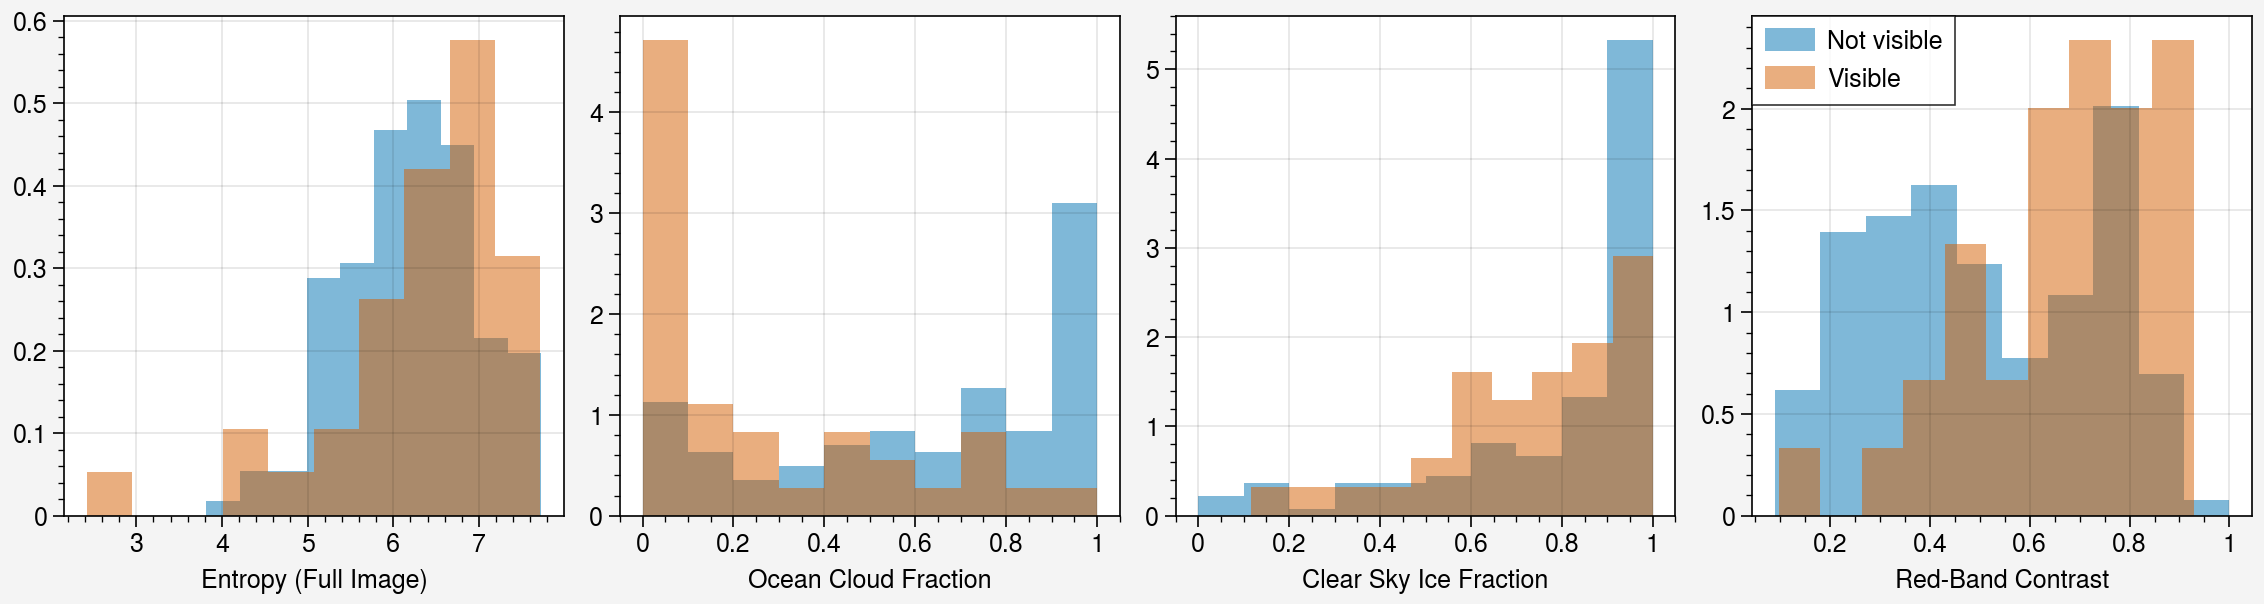

In [41]:
fig, axs = pplt.subplots(ncols=4, share=False)
plot_idx = train_idx & (df_merged.visible_floes == "yes") & ((df_merged.floe_obscuration == "none") | (df_merged.floe_obscuration == "light"))
for ax, var, xtitle in zip(axs, ["entropy", "ocean_cloud_fraction", "possible_clear_sky_ice", "contrast_red"],
                               ["Entropy (Full Image)", "Ocean Cloud Fraction", "Clear Sky Ice Fraction", "Red-Band Contrast"]):
    ax.hist(df_merged.loc[~plot_idx, var], alpha=0.5, density=True, label="Not visible")
    ax.hist(df_merged.loc[plot_idx, var], alpha=0.5, density=True, label="Visible")
    ax.format(xlabel=xtitle)
ax.legend(ncol=1)


In [42]:
df_merged.loc[df_merged.possible_clear_sky_ice > 0.8]

,Unnamed: 0,case_number,region,start_date,center_lon,center_lat,center_x,center_y,month,sea_ice_fraction,...,floe_obscuration,landfast_obscuration,modis_cloud_error,notes,training,case_name,entropy,contrast_red,ocean_cloud_fraction,possible_clear_sky_ice
1,002_aqua,2,baffin_bay,2015-03-12,-81.964289,76.057935,-912500,-1212500,3,1.000,...,NaN,NaN,no,NaN,True,002-baffin_bay-100km-20150312-aqua-250m,5.139165,0.584,0.104,0.963
4,006_aqua,6,baffin_bay,2022-05-30,-73.361194,75.260786,-762500,-1412500,5,1.000,...,moderate,NaN,no,dw: cleaned edges and added more floes,True,006-baffin_bay-100km-20220530-aqua-250m,7.034798,0.906,0.142,0.861
6,008_aqua,8,baffin_bay,2011-05-06,-72.284207,77.710993,-612500,-1187500,5,1.000,...,moderate,NaN,no,daniel: added a few additional floes,False,008-baffin_bay-100km-20110506-aqua-250m,5.268389,0.443,0.066,0.999
8,010_aqua,10,baffin_bay,2021-06-02,-72.181111,75.673625,-712500,-1387500,6,1.000,...,heavy,NaN,no,NaN,True,010-baffin_bay-100km-20210602-aqua-250m,5.641285,0.341,0.960,0.962
11,013_aqua,13,baffin_bay,2012-05-27,-69.092020,74.543225,-687500,-1537500,5,1.000,...,heavy,NaN,NaN,NaN,True,013-baffin_bay-100km-20120527-aqua-250m,5.910613,0.729,0.861,0.829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,172_aqua,172,sea_of_okhostk,2017-04-28,138.990913,56.162219,-262500,3762500,4,1.000,...,NaN,NaN,NaN,NaN,True,172-sea_of_okhostk-100km-20170428-aqua-250m,5.068538,0.200,0.958,1.000
171,173_aqua,173,sea_of_okhostk,2013-06-14,139.899092,54.639983,-337500,3937500,6,0.960,...,NaN,NaN,NaN,NaN,True,173-sea_of_okhostk-100km-20130614-aqua-250m,5.629066,0.239,0.931,0.996
172,174_aqua,174,sea_of_okhostk,2022-05-24,140.550500,54.183539,-387500,3987500,5,0.762,...,NaN,NaN,NaN,NaN,True,174-sea_of_okhostk-100km-20220524-aqua-250m,4.392029,0.090,0.498,1.000
175,177_aqua,177,sea_of_okhostk,2016-03-31,144.616592,55.785542,-637500,3762500,3,1.000,...,NaN,NaN,NaN,NaN,True,177-sea_of_okhostk-100km-20160331-aqua-250m,4.228902,0.094,0.997,1.000


In [57]:
# 50 km tiles
df_imstats.loc[(df_imstats.case_number == 4) & (df_imstats.satellite == "aqua")]

,case_number,case_name,satellite,tile,entropy,contrast_red,ocean_cloud_fraction,possible_clear_sky_ice,land_fraction
35,4,004-baffin_bay-100km-20190925-aqua-250m,aqua,0,2.423593,0.694,0.523,0.769,0.77
36,4,004-baffin_bay-100km-20190925-aqua-250m,aqua,1,0.732134,0.221,0.965,1.000,0.93
37,4,004-baffin_bay-100km-20190925-aqua-250m,aqua,2,1.972516,0.545,0.635,0.288,0.81
38,4,004-baffin_bay-100km-20190925-aqua-250m,aqua,3,0.767530,0.293,0.961,1.000,0.93
39,4,004-baffin_bay-100km-20190925-aqua-250m,aqua,4,5.191528,0.647,0.391,0.856,0.39


(array([15., 39., 31., 29., 12., 27., 21., 18., 14.,  3.]),
 array([0.055 , 0.1487, 0.2424, 0.3361, 0.4298, 0.5235, 0.6172, 0.7109,
        0.8046, 0.8983, 0.992 ]),
 <BarContainer object of 10 artists>)

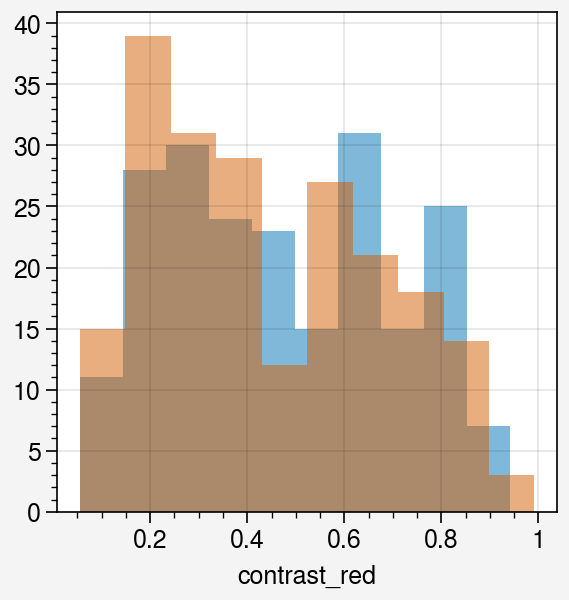

In [62]:
df_merged_1 = df.merge(df_imstats.loc[df_imstats.tile == 1], left_on=["satellite", "case_number"], right_on = ["satellite", "case_number"])
df_merged_2 = df.merge(df_imstats.loc[df_imstats.tile == 2], left_on=["satellite", "case_number"], right_on = ["satellite", "case_number"])
fig, ax = pplt.subplots()
ax.hist(df_merged_1.loc[train_idx, "contrast_red"], alpha=0.5)
ax.hist(df_merged_2.loc[train_idx, "contrast_red"], alpha=0.5)